# **Análise de Dados Pré Respetivo Tratamento**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# matplotlib inline

## Carregar os dataset de treino e de teste

In [2]:
TRAINING_DATASET_SOURCE = 'training_data.csv'
TEST_DATASET_SOURCE = 'test_data.csv'

In [3]:
train_df = pd.read_csv(TRAINING_DATASET_SOURCE)
test_df = pd.read_csv(TEST_DATASET_SOURCE)

## Exploração de dados

In [4]:
train_df.head()
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


- Quantidade de valores únicos de cada feature

In [5]:
for column in train_df.columns:
    train_df[column].value_counts()

- Definição do primeiro e do terceiro quartis
- Definição dos valores máximo (*upper*) e mínimo (*lower*)

In [6]:
numeric_columns = ['avg_temperature','avg_atm_pressure', 'avg_humidity', 'avg_wind_speed']
categorical_columns = ['city_name', 'magnitude_of_delay', 'luminosity', 'avg_rain']
whiskers = []

for num in numeric_columns:
    Q1 = train_df[num].quantile(0.25)
    Q3 = train_df[num].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    whiskers.append((num,lower,upper))

print(whiskers)

[('avg_temperature', 0.5, 28.5), ('avg_atm_pressure', 1004.5, 1032.5), ('avg_humidity', 22.5, 130.5), ('avg_wind_speed', -3.0, 5.0)]


## Visualização gráfica dos dados

- Matriz de correlação para valores numéricos

/var/folders/8y/y36_lcmn0tq020nptms4sypw0000gn/T/ipykernel_20207/3518762481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = train_df.corr()


<AxesSubplot: >

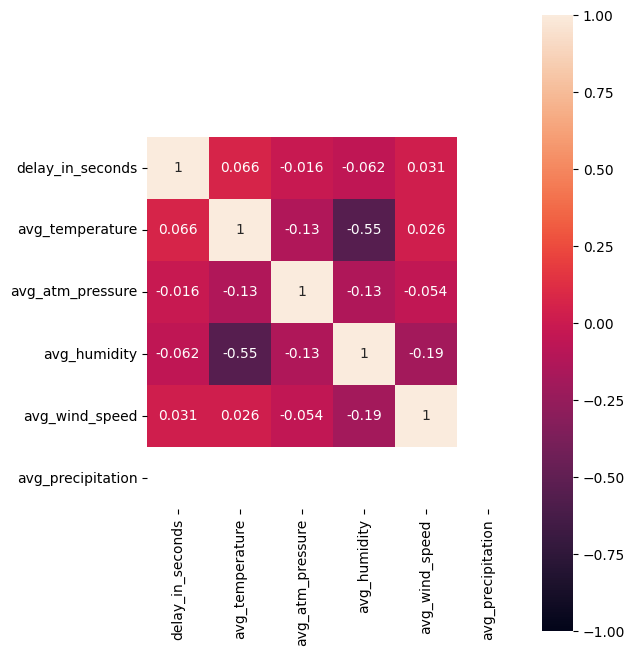

In [7]:
correlationMatrix = train_df.corr()
f, ax = plt.subplots(figsize=(6,8))
sns.heatmap(correlationMatrix, vmin=-1, vmax=1, square=True, annot=True)

- Distribuições bivariadas de pares num conjunto de dados

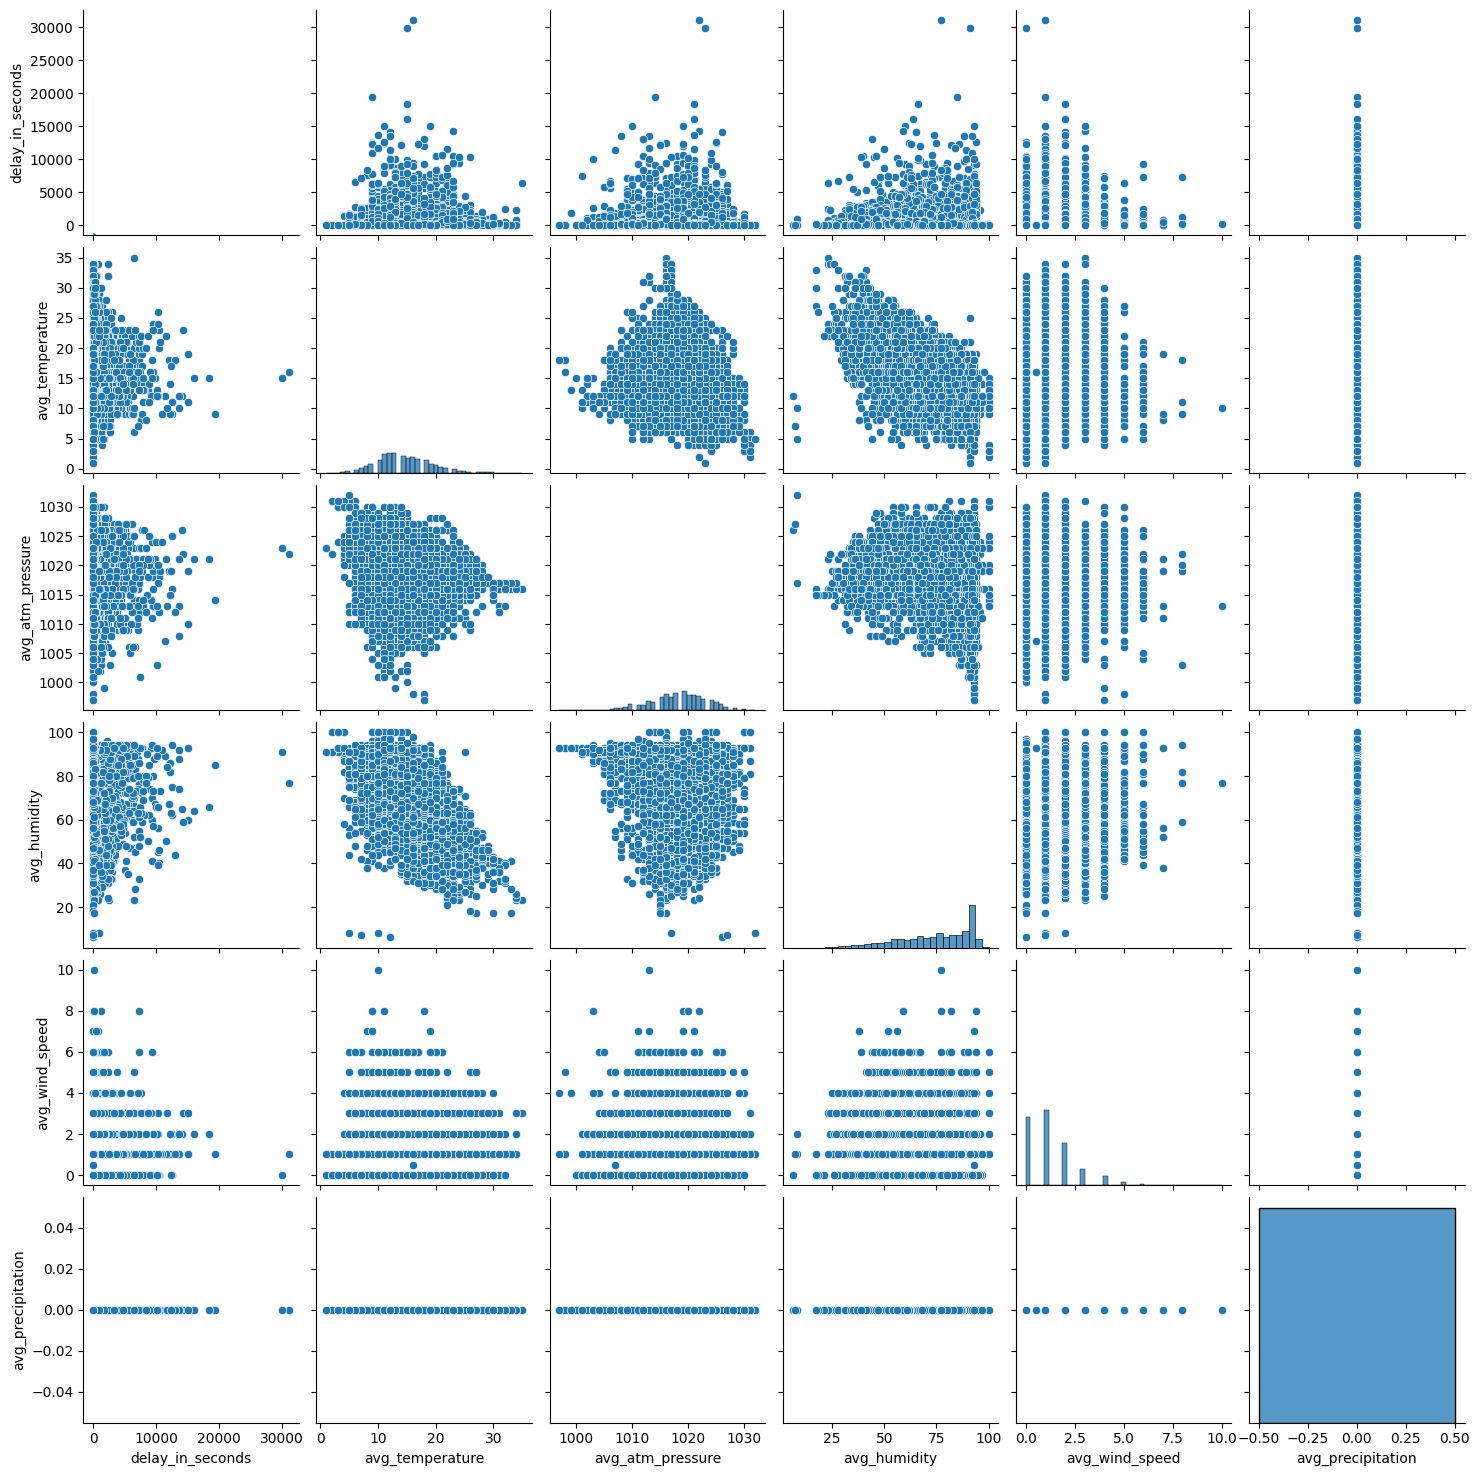

In [8]:
sns.pairplot(train_df)

- Diagrama de caixa para cada feature numérica

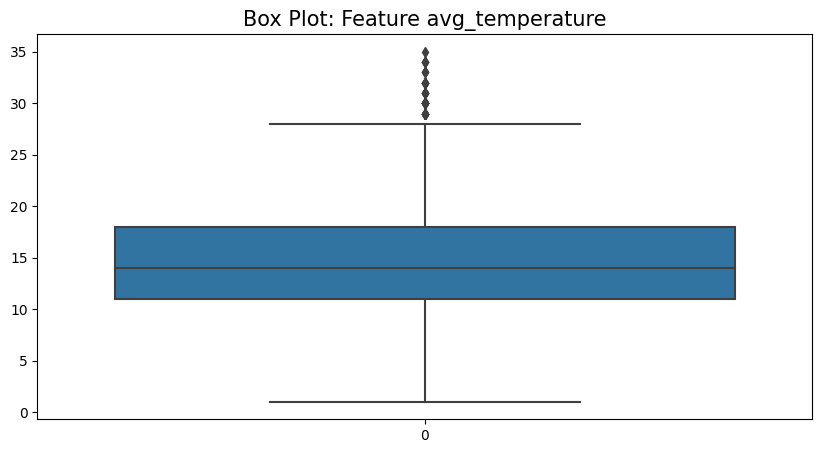

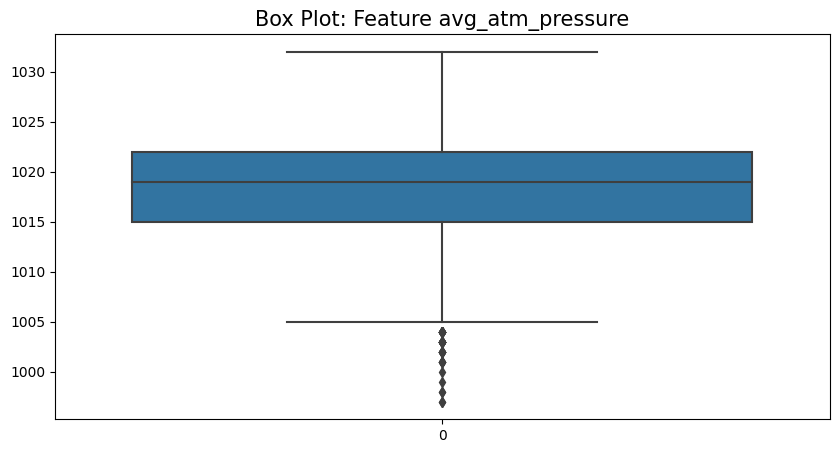

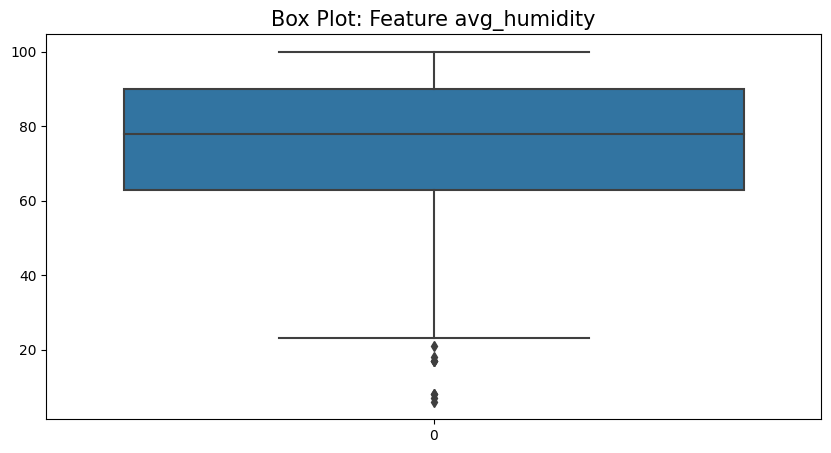

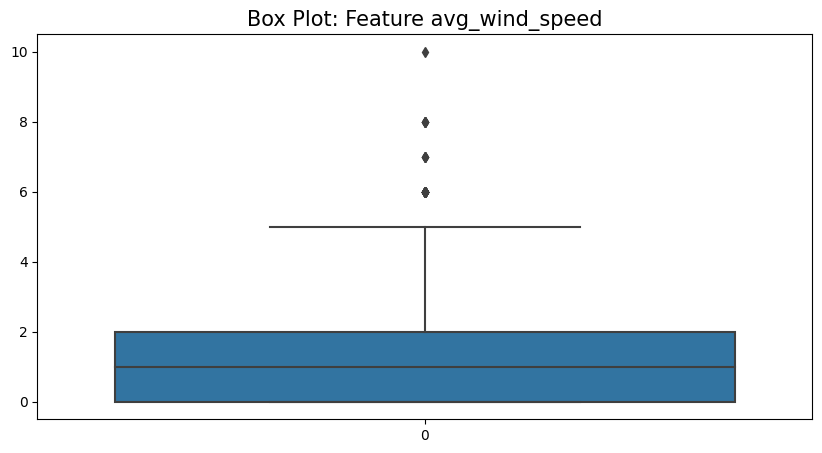

In [9]:
for num in numeric_columns:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(train_df[num])
    plt.title('Box Plot: Feature ' + num, fontsize=15)
    plt.show()

- Quantidade de valores nulos em cada feature

<AxesSubplot: >

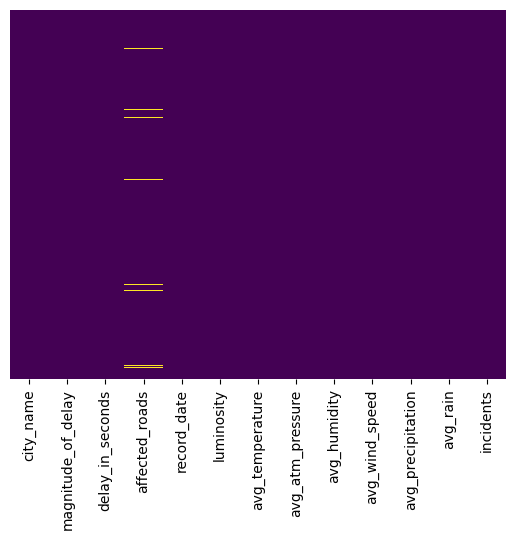

In [10]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Histogramas para cada feature categórica

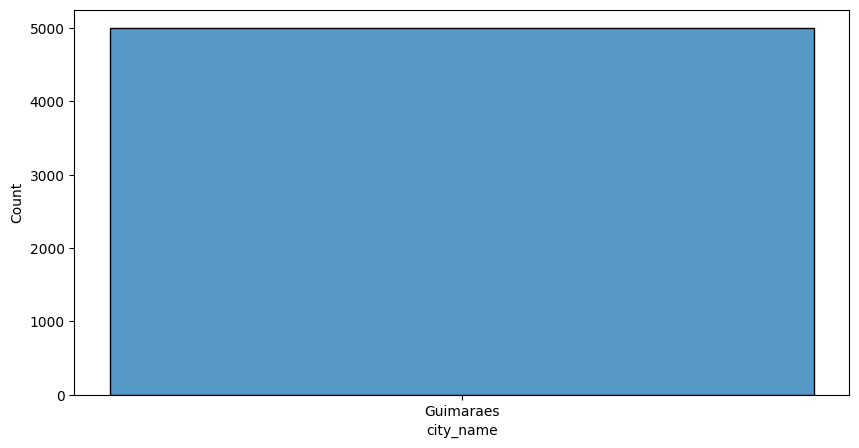

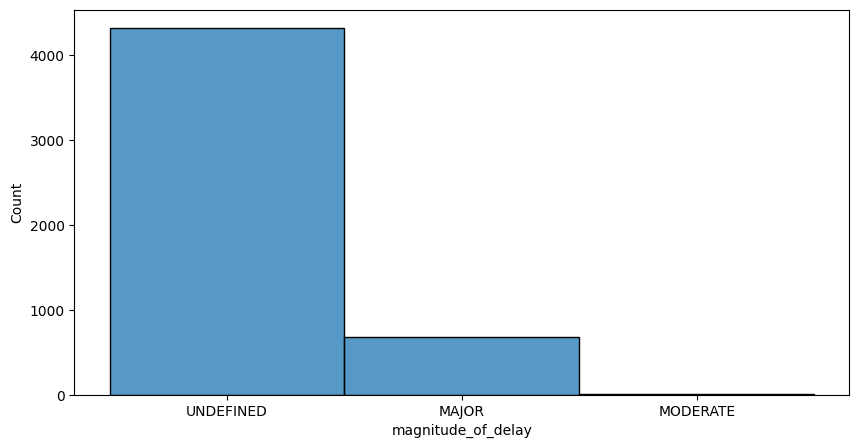

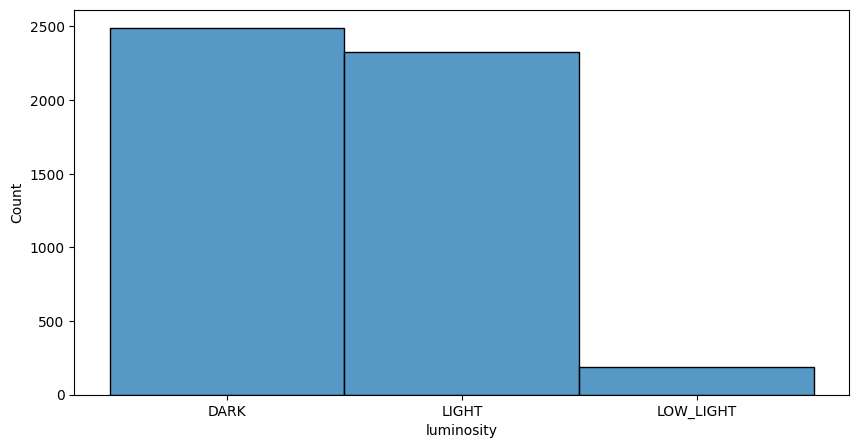

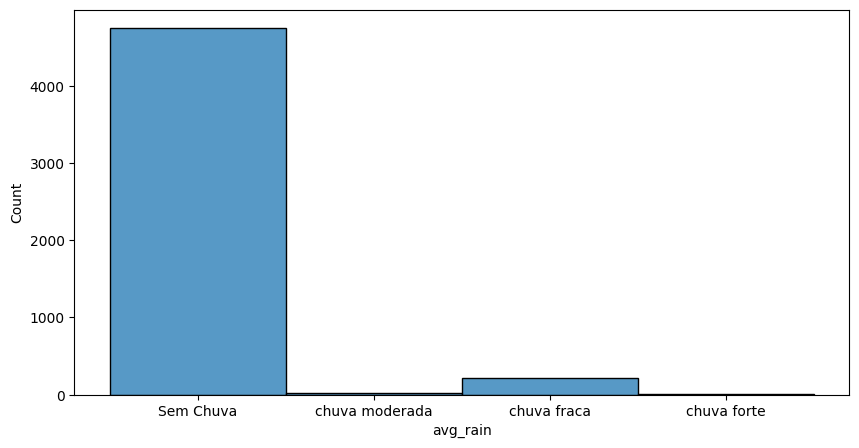

In [11]:
for categ in categorical_columns:
    fig = plt.figure(figsize=(10,5))
    sns.histplot(train_df[categ])

- Histograma de um conjunto univariante de observações da feature **incidents** (target)

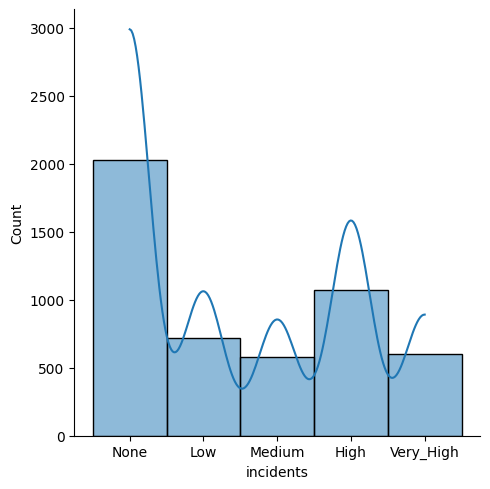

In [12]:
train_df['incidents'].unique()
train_df['incidents'] = pd.Categorical(train_df['incidents'], categories=['None', 'Low', 'Medium', 'High', 'Very_High'])
sns.displot(train_df['incidents'], kde=True)

- Histograma de um conjunto univariante de observações da feature **avg_wind_speed**

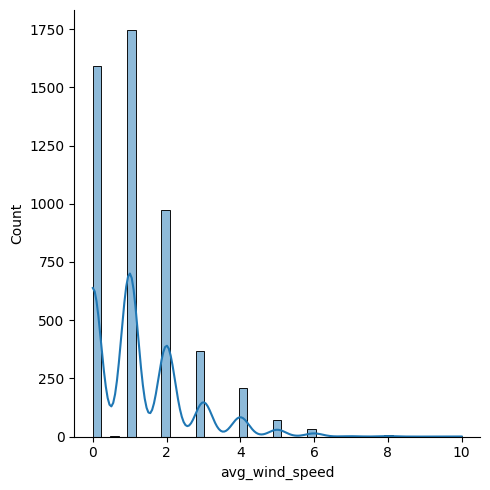

In [13]:
sns.displot(train_df['avg_wind_speed'], kde=True)

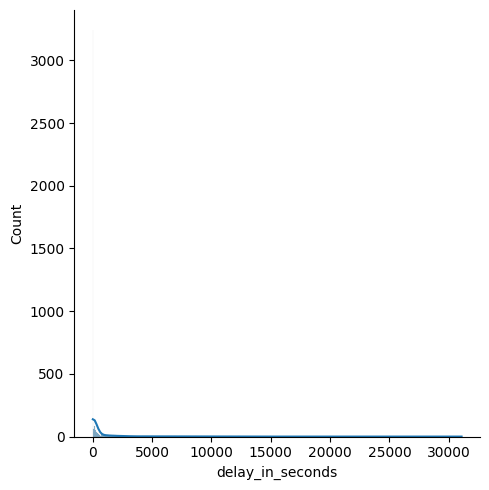

In [14]:
sns.displot(train_df['delay_in_seconds'], kde=True)

## Relação entre Features

- Relação entre a feature avg_rain e a feature incidents (target)

In [15]:
train_df.groupby(by=['avg_rain', 'incidents']).count()

city_name  magnitude_of_delay  delay_in_seconds  \
avg_rain       incidents                                                    
Sem Chuva      None            1959                1959              1959   
               Low              681                 681               681   
               Medium           548                 548               548   
               High            1015                1015              1015   
               Very_High        553                 553               553   
chuva forte    None               0                   0                 0   
               Low                2                   2                 2   
               Medium             0                   0                 0   
               High               0                   0                 0   
               Very_High          1                   1                 1   
chuva fraca    None              67                  67                67   
               Low               32                  32                32   
               Medium            26                  26                26   
               High              50                  50                50   
               Very_High         39                  39                39   
chuva moderada None               2                   2                 2   
               Low                3                   3                 3   
               Medium             4                   4                 4   
               High               8                   8                 8   
               Very_High         10                  10                10   

                          affected_roads  record_date  luminosity  \
avg_rain       incidents                                            
Sem Chuva      None                 1949         1959        1959   
               Low                   629          681         681   
               Medium                537          548         548   
               High                 1008         1015        1015   
               Very_High             553          553         553   
chuva forte    None                    0            0           0   
               Low                     2            2           2   
               Medium                  0            0           0   
               High                    0            0           0   
               Very_High               1            1           1   
chuva fraca    None                   67           67          67   
               Low                    29           32          32   
               Medium                 25           26          26   
               High                   50           50          50   
               Very_High              39           39          39   
chuva moderada None                    2            2           2   
               Low                     3            3           3   
               Medium                  3            4           4   
               High                    8            8           8   
               Very_High              10           10          10   

                          avg_temperature  avg_atm_pressure  avg_humidity  \
avg_rain       incidents                                                    
Sem Chuva      None                  1959              1959          1959   
               Low                    681               681           681   
               Medium                 548               548           548   
               High                  1015              1015          1015   
               Very_High              553               553           553   
chuva forte    None                     0                 0             0   
               Low                      2                 2             2   
               Medium                   0                 0             0   
               High                     0 

- Relação entre a feature magnitude_of_delay e a feature incidents (target)

In [16]:
train_df.groupby(by=['magnitude_of_delay', 'incidents']).count()

city_name  delay_in_seconds  affected_roads  \
magnitude_of_delay incidents                                                
MAJOR              None              23                23              15   
                   Low               62                62              61   
                   Medium            65                65              65   
                   High             162               162             162   
                   Very_High        366               366             366   
MODERATE           None               1                 1               1   
                   Low                0                 0               0   
                   Medium             2                 2               2   
                   High               3                 3               3   
                   Very_High          2                 2               2   
UNDEFINED          None            2004              2004            2002   
                   Low              656               656             602   
                   Medium           511               511             498   
                   High             908               908             901   
                   Very_High        235               235             235   

                              record_date  luminosity  avg_temperature  \
magnitude_of_delay incidents                                             
MAJOR              None                23          23               23   
                   Low                 62          62               62   
                   Medium              65          65               65   
                   High               162         162              162   
                   Very_High          366         366              366   
MODERATE           None                 1           1                1   
                   Low                  0           0                0   
                   Medium               2           2                2   
                   High                 3           3                3   
                   Very_High            2           2                2   
UNDEFINED          None              2004        2004             2004   
                   Low                656         656              656   
                   Medium             511         511              511   
                   High               908         908              908   
                   Very_High          235         235              235   

                              avg_atm_pressure  avg_humidity  avg_wind_speed  \
magnitude_of_delay incidents                                                   
MAJOR              None                     23            23              23   
                   Low                      62            62              62   
                   Medium                   65            65              65   
                   High                    162           162             162   
                   Very_High               366           366             366   
MODERATE           None                      1             1               1   
                   Low                       0             0               0   
                   Medium                    2             2               2   
                   High                      3             3               3   
                   Very_High                 2             2               2   
UNDEFINED          None                   2004          2004            2004   
                   Low                     656           656             656   
                   Medium                  511           511             511   
                   High                    908           908             908   
                   Very_High               235           235             235   

                              avg_precipitation  avg_rain  
magnitude_of_delay incidents            